In [1]:
import torch

# Input : 'Your journey starts with one step'

# these token embeddings are already optimized !
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

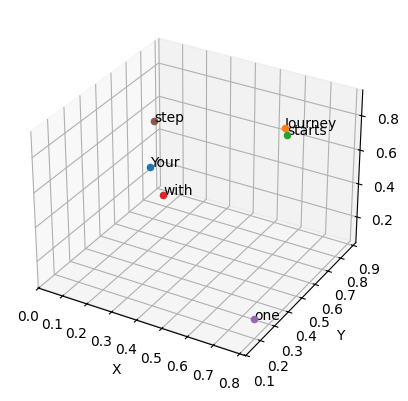

In [3]:
words = ['Your', 'Journey', 'starts', 'with', 'one', 'step']

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")

for x,y,z,word in zip(x_coords, y_coords, z_coords, words) :
    ax.scatter(x,y,z)
    ax.text(x,y,z,word,fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [4]:
# we will create a context vector for x2('Journey') token embedding
# here x2 will be called as query

In [5]:
# we will find the similarity / attenstion score between query and input vectors
# We will use dot project
## DOT Product : 
## parallel --> max, perpendicular --> 0

# query vector ('Jorney') and input vector 'Starts' will have higher attension scores
# query vector ('Jorney') and input vector 'one' will have lower attension score


In [6]:
query_vector = inputs[1] #x2
attention_scores_2 = torch.empty(inputs.shape[0]) # this is simple random initialtion
# of 6 attension scores --> dim = [6]
for i,x_i in enumerate(inputs) :
    attention_scores_2[i] = torch.dot(x_i,query_vector)
    
print(attention_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


In [7]:
# NORMALIZATION OF ATTENTION SCORES : FOR INTERPRETABILTY

attn_weights_2_tmp = attention_scores_2 / attention_scores_2.sum()

print(attn_weights_2_tmp)

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In [8]:
# We can use softmax for normalization 
attn_weights_2 = torch.softmax(attention_scores_2, dim = 0)
print(attn_weights_2)
print(inputs)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])


In [9]:
query = inputs[1]

context_vec_2 = torch.zeros(query.shape)

for i,x_i in enumerate(inputs) :
    context_vec_2 += attn_weights_2[i]*x_i

print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


# Attention Weight matrix

In [10]:
attention_weight_matrix = torch.zeros(inputs.shape)

for i, x_i in enumerate(inputs) :
    attn_weight_i = torch.empty(inputs.shape[0])
    
    for j,x_j in enumerate(inputs) :
        attn_weight_i[j] = torch.dot(x_j,x_i)
    
    attn_weight_i = torch.softmax(attn_weight_i,dim = 0)
    
    for k,x_k in enumerate(inputs) :
        attention_weight_matrix[i] += attn_weight_i[k]*x_k

attention_weight_matrix

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [15]:
# Analysis : 
# Input : [6,3] 
# --> 
#    [0.43, 0.15, 0.89], # Your     (x^1)
#    [0.55, 0.87, 0.66], # journey  (x^2)
#    [0.57, 0.85, 0.64], # starts   (x^3)
#    [0.22, 0.58, 0.33], # with     (x^4)
#    [0.77, 0.25, 0.10], # one      (x^5)
#    [0.05, 0.80, 0.55]

# for each input there will attention weights of dim [6]
# Attention weight matrix : [6,6]

# We can create it using above formula OR --> 
atten_weight_matrix = inputs @ torch.t(inputs)
# @ is matrix multiplication
atten_weight_matrix = torch.softmax(atten_weight_matrix, dim = 1)


# Now calculating the context vectors using Matrix multiplication
context_vectors = atten_weight_matrix @ inputs

context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

## Self Attention with Trainable Weights
## Or Scaled dot product attension

In [ ]:
# we will use Wq, Wk, Kv (key,query and value) weight matrices

In [18]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your     (x^1)
   [0.55, 0.87, 0.66], # journey  (x^2)
   [0.57, 0.85, 0.64], # starts   (x^3)
   [0.22, 0.58, 0.33], # with     (x^4)
   [0.77, 0.25, 0.10], # one      (x^5)
   [0.05, 0.80, 0.55]] # step     (x^6)
)
# inputs dim : [6,3]

d_in = inputs.shape[1] # 3 --> it is the dimension of vector in vector embedding matrix
d_out = 2 # Hyperparameter


In [38]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
W_key = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)
W_value = torch.nn.Parameter(torch.rand(d_in,d_out), requires_grad = False)

In [39]:
print(inputs)
print(W_query)
print(W_key)
print(W_value)


tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [22]:
x_2 = inputs[2]
x_2

tensor([0.5700, 0.8500, 0.6400])

In [40]:
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value

print(query_2)

tensor([0.4300, 1.4343])


In [41]:
keys = inputs @ W_key
queries = inputs @ W_query
values = inputs @ W_value

keys, queries, values

(tensor([[0.3669, 0.7646],
         [0.4433, 1.1419],
         [0.4361, 1.1156],
         [0.2408, 0.6706],
         [0.1827, 0.3292],
         [0.3275, 0.9642]]),
 tensor([[0.2309, 1.0966],
         [0.4306, 1.4551],
         [0.4300, 1.4343],
         [0.2355, 0.7990],
         [0.2983, 0.6565],
         [0.2568, 1.0533]]),
 tensor([[0.1855, 0.8812],
         [0.3951, 1.0037],
         [0.3879, 0.9831],
         [0.2393, 0.5493],
         [0.1492, 0.3346],
         [0.3221, 0.7863]]))

In [58]:
## Attenstion matrix :
atten_mat = queries @ torch.t(keys)
# queries : [6,2] keys : [6,2]
# atten_mat = torch.softmax(atten_mat, dim = 1)
# atten_mat


In [59]:
## Before Softmax is done : 
# we will scale by Root under (dim of key)
import math
scale_factor = math.sqrt(keys.shape[-1])
scale_factor

1.4142135623730951

In [60]:
atten_mat2 = torch.softmax(atten_mat / scale_factor, dim = -1)

In [61]:
atten_mat2

tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])

In [64]:
# why dividing by scaling factor : 
# Reason 1 )  For maintaining stability
"""
Attention matrix is just dot(queries, keys)
It can sometimes become too large, 
so the softmax can be too edgdy for some values, so we tend to reduce the 
attention matrix values by divind it with Root(dim(key)) == root(2) here
"""

# But why diving it wiht root ? 
"""
Variance increases with increase in dim of keys(here 2), but if we divide 
the attn_mat by root(dim(keys)), the variance comes close to 1, which is good
"""

'\nVariance increases with increase in dim of keys(here 2), but if we divide \nthe attn_mat by root(dim(keys)), the variance comes close to 1, which is good\n'

In [66]:
# Computing the context vectors
"""
Context vector for nth input : Sum (attn_score * val matrix)
"""

context_vectors_all = atten_mat2 @ values
print(context_vectors_all.shape)
context_vectors_all

torch.Size([6, 2])


tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])

In [75]:
# Creting A self Attention Model :
torch.manual_seed(123)
import torch
from torch import nn

class selfAttention_v1(nn.Module) :
    def __init__(self, in_dim, out_dim) : 
        super().__init__()
        # in_dim is the dim of vector embeddings
        # out_dim is a hyperparam
        
        self.W_query = nn.Parameter(torch.rand(in_dim, out_dim))
        self.W_key = nn.Parameter(torch.rand(in_dim, out_dim))
        self.W_value = nn.Parameter(torch.rand(in_dim, out_dim))
    
    def forward(self, x) :
#         x is input : 
        queries = x @ self.W_query
        keys = x @ self.W_key
        values = x @ self.W_value
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
        
        context_vectors = attn_weights @ values
        return context_vectors


In [76]:
self_att = selfAttention_v1(3,2)
self_att(inputs)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)

In [77]:
class selfAttention_v2(nn.Module) : 
    def __init__(self, inp, out, qkv_bias=False) : 
        super().__init()
        # nn.Linear also creates a trainable matrix of in_dim X out_dim
        self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)
        
    def forward(self, x) :
#         x is input : 
        queries = x @ self.W_query
        keys = x @ self.W_key
        values = x @ self.W_value
        
        attn_scores = queries @ keys.T
        attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim = -1)
        
        context_vectors = attn_weights @ values
        return context_vectors
